In [16]:
import pandas as pd
import numpy as np
import time
import sklearn
import warnings
import pickle

warnings.filterwarnings(action='ignore', category=FutureWarning)

pd.__version__, sklearn.__version__

('2.1.1', '1.2.1')

In [17]:
SCRATCH_DIR = "/scratch/siads696f23_class_root/siads696f23_class/psollars"

In [18]:
start_time = time.time()
all_features_2019 = pd.read_parquet(f"{SCRATCH_DIR}/all_features_2019.parquet")
end_time = time.time()

print(f"Elapsed time: {(end_time - start_time):.4f} seconds")

all_features_2019

Elapsed time: 45.8577 seconds


,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginCityMarketID,...,TC-DATA-HOLDER,faa_registration_origin,Origin_DISPLAY_AIRPORT_NAME,Origin_DISPLAY_AIRPORT_CITY_NAME_FULL,Origin_LATITUDE,Origin_LONGITUDE,Dest_DISPLAY_AIRPORT_NAME,Dest_DISPLAY_AIRPORT_CITY_NAME_FULL,Dest_LATITUDE,Dest_LONGITUDE
24733033,2019,1,1,4,5,2019-01-04 00:00:00,OO,945SW,5657,34236,...,...,2023.0,San Luis County Regional,"San Luis Obispo, CA",35.237222,-120.642500,San Francisco International,"San Francisco, CA",37.618889,-122.375556
24733034,2019,1,1,4,5,2019-01-04 00:00:00,OO,932SW,5658,31453,...,...,2023.0,George Bush Intercontinental/Houston,"Houston, TX",29.984444,-95.341389,Northwest Arkansas National,"Fayetteville, AR",36.281667,-94.307778
24733035,2019,1,1,4,5,2019-01-04 00:00:00,OO,932SW,5658,34783,...,...,2023.0,Springfield-Branson National,"Springfield, MO",37.245556,-93.388611,George Bush Intercontinental/Houston,"Houston, TX",29.984444,-95.341389
24733036,2019,1,1,4,5,2019-01-04 00:00:00,OO,916SW,5659,32389,...,...,2023.0,Sloulin Field International,"Williston, ND",48.178056,-103.642222,Denver International,"Denver, CO",39.861667,-104.673056
24733037,2019,1,1,4,5,2019-01-04 00:00:00,OO,107SY,5660,33342,...,...,2023.0,General Mitchell International,"Milwaukee, WI",42.946944,-87.896944,Denver International,"Denver, CO",39.861667,-104.673056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32288695,2019,4,12,1,7,2019-12-01 00:00:00,DL,346DN,830,30397,...,AIRBUS SAS ...,2023.0,Hartsfield-Jackson Atlanta International,"Atlanta, GA",33.636667,-84.427778,LaGuardia,"New York, NY",40.777222,-73.872500
32288696,2019,4,12,1,7,2019-12-01 00:00:00,DL,697DL,831,31454,...,...,2023.0,Orlando International,"Orlando, FL",28.429444,-81.308889,Minneapolis-St Paul International,"Minneapolis, MN",44.881944,-93.221667
32288697,2019,4,12,1,7,2019-12-01 00:00:00,DL,697DL,831,31650,...,...,2023.0,Minneapolis-St Paul International,"Minneapolis, MN",44.881944,-93.221667,Orlando International,"Orlando, FL",28.429444,-81.308889
32288698,2019,4,12,1,7,2019-12-01 00:00:00,DL,6714Q,832,30852,...,...,2023.0,Ronald Reagan Washington National,"Washington, DC",38.851389,-77.037778,Salt Lake City International,"Salt Lake City, UT",40.788333,-111.977778


In [19]:
ua_df = all_features_2019[all_features_2019["Reporting_Airline"].eq("UA")].drop("Reporting_Airline", axis=1)

ua_df

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Tail_Number,Flight_Number_Reporting_Airline,OriginCityMarketID,Origin,...,TC-DATA-HOLDER,faa_registration_origin,Origin_DISPLAY_AIRPORT_NAME,Origin_DISPLAY_AIRPORT_CITY_NAME_FULL,Origin_LATITUDE,Origin_LONGITUDE,Dest_DISPLAY_AIRPORT_NAME,Dest_DISPLAY_AIRPORT_CITY_NAME_FULL,Dest_LATITUDE,Dest_LONGITUDE
25272175,2019,1,1,22,2,2019-01-22 00:00:00,19141,1981,32575,LAX,...,...,2023.0,Los Angeles International,"Los Angeles, CA",33.942500,-118.408056,George Bush Intercontinental/Houston,"Houston, TX",29.984444,-95.341389
25272176,2019,1,1,22,2,2019-01-22 00:00:00,68802,1980,31453,IAH,...,...,2023.0,George Bush Intercontinental/Houston,"Houston, TX",29.984444,-95.341389,Orlando International,"Orlando, FL",28.429444,-81.308889
25272177,2019,1,1,22,2,2019-01-22 00:00:00,34455,1980,31454,MCO,...,...,2023.0,Orlando International,"Orlando, FL",28.429444,-81.308889,Newark Liberty International,"Newark, NJ",40.692500,-74.168611
25272178,2019,1,1,22,2,2019-01-22 00:00:00,480UA,1979,30852,IAD,...,AIRBUS SAS ...,2023.0,Washington Dulles International,"Washington, DC",38.947500,-77.460000,Pittsburgh International,"Pittsburgh, PA",40.491389,-80.232778
25272179,2019,1,1,22,2,2019-01-22 00:00:00,19117,1978,31703,EWR,...,...,2023.0,Newark Liberty International,"Newark, NJ",40.692500,-74.168611,San Francisco International,"San Francisco, CA",37.618889,-122.375556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32219998,2019,4,12,28,6,2019-12-28 00:00:00,495UA,740,33192,SMF,...,AIRBUS SAS ...,2023.0,Sacramento International,"Sacramento, CA",38.695556,-121.590833,Denver International,"Denver, CO",39.861667,-104.673056
32219999,2019,4,12,28,6,2019-12-28 00:00:00,810UA,739,33105,CVG,...,AIRBUS SAS ...,2023.0,Cincinnati/Northern Kentucky International,"Cincinnati, OH",39.048889,-84.667778,George Bush Intercontinental/Houston,"Houston, TX",29.984444,-95.341389
32220000,2019,4,12,28,6,2019-12-28 00:00:00,75435,737,30325,DEN,...,...,2023.0,Denver International,"Denver, CO",39.861667,-104.673056,San Francisco International,"San Francisco, CA",37.618889,-122.375556
32220001,2019,4,12,28,6,2019-12-28 00:00:00,811UA,736,33570,SAN,...,AIRBUS SAS ...,2023.0,San Diego International,"San Diego, CA",32.733611,-117.189722,San Francisco International,"San Francisco, CA",37.618889,-122.375556


In [20]:
df = ua_df[ua_df["Cancelled"].eq(0) & ua_df["Diverted"].eq(0)].copy()

print(f"Removed {len(ua_df) - len(df)} rows")

# We'll need to recompute the delayed label
# If the flight is delayed on departure or arrival, consider it delayed overall

df["delayed"] = (df["DepDel15"].eq(1)) | (df["ArrDel15"].eq(1))

df

Removed 7364 rows


,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Tail_Number,Flight_Number_Reporting_Airline,OriginCityMarketID,Origin,...,faa_registration_origin,Origin_DISPLAY_AIRPORT_NAME,Origin_DISPLAY_AIRPORT_CITY_NAME_FULL,Origin_LATITUDE,Origin_LONGITUDE,Dest_DISPLAY_AIRPORT_NAME,Dest_DISPLAY_AIRPORT_CITY_NAME_FULL,Dest_LATITUDE,Dest_LONGITUDE,delayed
25272175,2019,1,1,22,2,2019-01-22 00:00:00,19141,1981,32575,LAX,...,2023.0,Los Angeles International,"Los Angeles, CA",33.942500,-118.408056,George Bush Intercontinental/Houston,"Houston, TX",29.984444,-95.341389,False
25272176,2019,1,1,22,2,2019-01-22 00:00:00,68802,1980,31453,IAH,...,2023.0,George Bush Intercontinental/Houston,"Houston, TX",29.984444,-95.341389,Orlando International,"Orlando, FL",28.429444,-81.308889,False
25272177,2019,1,1,22,2,2019-01-22 00:00:00,34455,1980,31454,MCO,...,2023.0,Orlando International,"Orlando, FL",28.429444,-81.308889,Newark Liberty International,"Newark, NJ",40.692500,-74.168611,True
25272178,2019,1,1,22,2,2019-01-22 00:00:00,480UA,1979,30852,IAD,...,2023.0,Washington Dulles International,"Washington, DC",38.947500,-77.460000,Pittsburgh International,"Pittsburgh, PA",40.491389,-80.232778,False
25272179,2019,1,1,22,2,2019-01-22 00:00:00,19117,1978,31703,EWR,...,2023.0,Newark Liberty International,"Newark, NJ",40.692500,-74.168611,San Francisco International,"San Francisco, CA",37.618889,-122.375556,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32219998,2019,4,12,28,6,2019-12-28 00:00:00,495UA,740,33192,SMF,...,2023.0,Sacramento International,"Sacramento, CA",38.695556,-121.590833,Denver International,"Denver, CO",39.861667,-104.673056,True
32219999,2019,4,12,28,6,2019-12-28 00:00:00,810UA,739,33105,CVG,...,2023.0,Cincinnati/Northern Kentucky International,"Cincinnati, OH",39.048889,-84.667778,George Bush Intercontinental/Houston,"Houston, TX",29.984444,-95.341389,False
32220000,2019,4,12,28,6,2019-12-28 00:00:00,75435,737,30325,DEN,...,2023.0,Denver International,"Denver, CO",39.861667,-104.673056,San Francisco International,"San Francisco, CA",37.618889,-122.375556,True
32220001,2019,4,12,28,6,2019-12-28 00:00:00,811UA,736,33570,SAN,...,2023.0,San Diego International,"San Diego, CA",32.733611,-117.189722,San Francisco International,"San Francisco, CA",37.618889,-122.375556,False


In [21]:
def evaluate_completeness(df):
    total_rows = len(df)
    completeness = {}

    all_missing = df.isna() | (df == "") | (df.map(str).map(str.strip) == "")

    completeness = (all_missing.sum() / total_rows * 100).to_dict()

    return completeness


start_time = time.time()
completeness = evaluate_completeness(df)
end_time = time.time()

print(f"Elapsed time: {(end_time - start_time):.4f} seconds")

completeness

Elapsed time: 42.7257 seconds


{'Year': 0.0,
 'Quarter': 0.0,
 'Month': 0.0,
 'DayofMonth': 0.0,
 'DayOfWeek': 0.0,
 'FlightDate': 0.0,
 'Tail_Number': 0.0,
 'Flight_Number_Reporting_Airline': 0.0,
 'OriginCityMarketID': 0.0,
 'Origin': 0.0,
 'DestCityMarketID': 0.0,
 'Dest': 0.0,
 'CRSDepTime': 0.0,
 'DepTime': 0.0,
 'DepDelay': 0.0,
 'DepDelayMinutes': 0.0,
 'DepDel15': 0.0,
 'DepartureDelayGroups': 0.0,
 'DepTimeBlk': 0.0,
 'TaxiOut': 0.0,
 'WheelsOff': 0.0,
 'WheelsOn': 0.0,
 'TaxiIn': 0.0,
 'CRSArrTime': 0.0,
 'ArrTime': 0.0,
 'ArrDelay': 0.0,
 'ArrDelayMinutes': 0.0,
 'ArrDel15': 0.0,
 'ArrivalDelayGroups': 0.0,
 'ArrTimeBlk': 0.0,
 'Cancelled': 0.0,
 'CancellationCode': 100.0,
 'Diverted': 0.0,
 'CRSElapsedTime': 0.0,
 'ActualElapsedTime': 0.0,
 'AirTime': 0.0,
 'Flights': 0.0,
 'Distance': 0.0,
 'DistanceGroup': 0.0,
 'CarrierDelay': 0.0,
 'WeatherDelay': 0.0,
 'NASDelay': 0.0,
 'SecurityDelay': 0.0,
 'LateAircraftDelay': 0.0,
 'DivAirportLandings': 0.0,
 'N-NUMBER': 0.0,
 'SERIAL NUMBER': 0.0,
 'MFR MDL COD

In [22]:
remove_cols = {}

for feature, comp in completeness.items():
    if comp > 5:
        remove_cols[feature] = comp

remove_cols

{'CancellationCode': 100.0,
 'STREET2': 43.81866546965561,
 'FRACT OWNER': 99.7147088528767,
 'OTHER NAMES(1)': 98.85203900190773,
 'OTHER NAMES(2)': 100.0,
 'OTHER NAMES(3)': 100.0,
 'OTHER NAMES(4)': 100.0,
 'OTHER NAMES(5)': 100.0,
 'KIT MFR': 100.0,
 ' KIT MODEL': 100.0,
 'TC-DATA-SHEET': 65.87680796349538,
 'TC-DATA-HOLDER': 65.87680796349538}

In [23]:
# Removed features are filtered off or incomplete/unimportant

numeric_columns = [
    'Year',
    'Quarter',
    'Month',
    'DayofMonth',
    'DayOfWeek',
    'CRSDepTime',
    'DepTime',
    'DepDelay',
    'DepDelayMinutes',
    'DepDel15',
    'DepartureDelayGroups',
    'TaxiOut',
    'WheelsOff',
    'WheelsOn',
    'TaxiIn',
    'CRSArrTime',
    'ArrTime',
    'ArrDelay',
    'ArrDelayMinutes',
    'ArrDel15',
    'ArrivalDelayGroups',
#     'Cancelled',
#     'Diverted',
    'CRSElapsedTime',
    'ActualElapsedTime',
    'AirTime',
    'Flights',
    'Distance',
    'DistanceGroup',
    'CarrierDelay',
    'WeatherDelay',
    'NASDelay',
    'SecurityDelay',
    'LateAircraftDelay',
    'DivAirportLandings',
    'YEAR MFR',
    'HORSEPOWER',
    'THRUST',
    'NO-ENG',
    'NO-SEATS',
    'SPEED',
    'Origin_LATITUDE',
    'Origin_LONGITUDE',
    'Dest_LATITUDE',
    'Dest_LONGITUDE'
]

categorical_columns = [
    'FlightDate',
    'Tail_Number',
    'Flight_Number_Reporting_Airline',
    'OriginCityMarketID',
    'Origin',
    'DestCityMarketID',
    'Dest',
    'DepTimeBlk',
    'ArrTimeBlk',
#     'CancellationCode',
    'N-NUMBER',
    'SERIAL NUMBER',
    'MFR MDL CODE',
    'ENG MFR MDL',
    'TYPE REGISTRANT',
    'NAME',
#     'STREET',
#     'STREET2',
#     'CITY',
#     'STATE',
#     'ZIP CODE',
#     'REGION',
#     'COUNTY',
#     'COUNTRY',
    'LAST ACTION DATE',
    'CERT ISSUE DATE',
    'CERTIFICATION',
    'TYPE AIRCRAFT',
    'TYPE ENGINE',
    'STATUS CODE',
    'MODE S CODE',
#     'FRACT OWNER',
    'AIR WORTH DATE',
#     'OTHER NAMES(1)',
#     'OTHER NAMES(2)',
#     'OTHER NAMES(3)',
#     'OTHER NAMES(4)',
#     'OTHER NAMES(5)',
    'EXPIRATION DATE',
    'UNIQUE ID',
#     'KIT MFR',
#     ' KIT MODEL',
    'MODE S CODE HEX',
    'CODE',
    'MFR',
    'MODEL',
    'TYPE',
    'CODE_aircraft',
    'MFR_aircraft',
    'MODEL_aircraft',
    'TYPE-ACFT',
    'TYPE-ENG',
    'AC-CAT',
    'AC-WEIGHT',
    'BUILD-CERT-IND',
#     'TC-DATA-SHEET',
#     'TC-DATA-HOLDER',
    'faa_registration_origin',
    'Origin_DISPLAY_AIRPORT_NAME',
    'Origin_DISPLAY_AIRPORT_CITY_NAME_FULL',
    'Dest_DISPLAY_AIRPORT_NAME',
    'Dest_DISPLAY_AIRPORT_CITY_NAME_FULL',
#     'delayed'  # target variable
]



In [24]:
# Identify problematic columns
for col in numeric_columns:
    try:
        df[col].astype(float)
    except ValueError:
        print(f"Column {col} contains non-convertible values.")

Column YEAR MFR contains non-convertible values.


In [25]:
df["YEAR MFR"] = df["YEAR MFR"].replace(r"^\s*$", np.nan, regex=True)

df["YEAR MFR"].astype(float)

25272175    2000.0
25272176    2013.0
25272177    2012.0
25272178    2001.0
25272179    1996.0
             ...  
32219998    2002.0
32219999    1998.0
32220000    2009.0
32220001    1998.0
32220002    2014.0
Name: YEAR MFR, Length: 632687, dtype: float64

In [26]:
# num_cols = [
#     "CRSDepTime",
#     "CRSArrTime",
#     "Origin_LATITUDE",
#     "Origin_LONGITUDE",
#     "Dest_LATITUDE",
#     "Dest_LONGITUDE",
# ]

# cat_cols = [
#     "Month",
#     "DayOfWeek",
#     # "Reporting_Airline",
#     "Tail_Number",
#     "DistanceGroup",
#     "YEAR MFR",
#     "engine_manufacturer",
#     "engine_model",
#     "aircraft_manufacturer",
#     "aircraft_model",
# ]

In [27]:
df_dropped_na = df[numeric_columns + categorical_columns + ["delayed"]].copy()

df_dropped_na = df_dropped_na.dropna(axis="index", how=("any"))

df_dropped_na

,Year,Quarter,Month,DayofMonth,DayOfWeek,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,...,TYPE-ENG,AC-CAT,AC-WEIGHT,BUILD-CERT-IND,faa_registration_origin,Origin_DISPLAY_AIRPORT_NAME,Origin_DISPLAY_AIRPORT_CITY_NAME_FULL,Dest_DISPLAY_AIRPORT_NAME,Dest_DISPLAY_AIRPORT_CITY_NAME_FULL,delayed
25272175,2019,1,1,22,2,1140,1134,-6,0,0,...,5.0,1.0,CLASS 3,0.0,2023.0,Los Angeles International,"Los Angeles, CA",George Bush Intercontinental/Houston,"Houston, TX",False
25272176,2019,1,1,22,2,1204,1159,-5,0,0,...,5.0,1.0,CLASS 3,0.0,2023.0,George Bush Intercontinental/Houston,"Houston, TX",Orlando International,"Orlando, FL",False
25272177,2019,1,1,22,2,1606,1604,-2,0,0,...,5.0,1.0,CLASS 3,0.0,2023.0,Orlando International,"Orlando, FL",Newark Liberty International,"Newark, NJ",True
25272178,2019,1,1,22,2,2230,2221,-9,0,0,...,5.0,1.0,CLASS 3,0.0,2023.0,Washington Dulles International,"Washington, DC",Pittsburgh International,"Pittsburgh, PA",False
25272179,2019,1,1,22,2,1300,1304,4,4,0,...,5.0,1.0,CLASS 3,0.0,2023.0,Newark Liberty International,"Newark, NJ",San Francisco International,"San Francisco, CA",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32219998,2019,4,12,28,6,0634,0725,51,51,1,...,5.0,1.0,CLASS 3,0.0,2023.0,Sacramento International,"Sacramento, CA",Denver International,"Denver, CO",True
32219999,2019,4,12,28,6,0900,0901,1,1,0,...,4.0,1.0,CLASS 3,0.0,2023.0,Cincinnati/Northern Kentucky International,"Cincinnati, OH",George Bush Intercontinental/Houston,"Houston, TX",False
32220000,2019,4,12,28,6,1715,1801,46,46,1,...,5.0,1.0,CLASS 3,0.0,2023.0,Denver International,"Denver, CO",San Francisco International,"San Francisco, CA",True
32220001,2019,4,12,28,6,1702,1711,9,9,0,...,4.0,1.0,CLASS 3,0.0,2023.0,San Diego International,"San Diego, CA",San Francisco International,"San Francisco, CA",False


In [28]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


start_time = time.time()

X = df_dropped_na.drop("delayed", axis=1)
y = df_dropped_na["delayed"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_columns),
        ("cat", OneHotEncoder(), categorical_columns),
    ]
)

X_transformed = preprocessor.fit_transform(X)

end_time = time.time()

print(f"Elapsed time: {(end_time - start_time):.4f} seconds")

Elapsed time: 29.8266 seconds


In [29]:
from sklearn.model_selection import train_test_split

start_time = time.time()

X_train, X_test, y_train, y_test = train_test_split(
    X_transformed, y, test_size=0.2, random_state=42
)

end_time = time.time()

print(f"Elapsed time: {(end_time - start_time):.4f} seconds")

Elapsed time: 1.3239 seconds


In [30]:
from sklearn.linear_model import Lasso

start_time = time.time()

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

end_time = time.time()

print(f"Elapsed time: {(end_time - start_time):.4f} seconds")

Elapsed time: 186.7977 seconds


In [31]:
with open(f"{SCRATCH_DIR}/08_lasso_feature_selection_2019_UA.pkl", "wb") as f:
    pickle.dump(lasso, f)

In [32]:
feature_names = numeric_columns + list(
    preprocessor.named_transformers_["cat"].get_feature_names_out(categorical_columns)
)

important_features = np.nonzero(lasso.coef_)[0]
important_feature_names = [feature_names[i] for i in important_features]

print("Important features:", important_feature_names)

Important features: ['DepDel15', 'ArrDel15']


In [40]:
# Removed features are true indicators of a delay, these won't be available for a future flight
# Important features: ['DepDel15', 'ArrDel15']

numeric_columns = [
    'Year',
    'Quarter',
    'Month',
    'DayofMonth',
    'DayOfWeek',
    'CRSDepTime',
#     'DepTime',
#     'DepDelay',
#     'DepDelayMinutes',
#     'DepDel15',
#     'DepartureDelayGroups',
    'TaxiOut',
    'WheelsOff',
    'WheelsOn',
    'TaxiIn',
    'CRSArrTime',
#     'ArrTime',
#     'ArrDelay',
#     'ArrDelayMinutes',
#     'ArrDel15',
#     'ArrivalDelayGroups',
    'CRSElapsedTime',
#     'ActualElapsedTime',
    'AirTime',
    'Flights',
    'Distance',
    'DistanceGroup',
#     'CarrierDelay',
#     'WeatherDelay',
#     'NASDelay',
#     'SecurityDelay',
#     'LateAircraftDelay',
    'DivAirportLandings',
    'YEAR MFR',
    'HORSEPOWER',
    'THRUST',
    'NO-ENG',
    'NO-SEATS',
    'SPEED',
    'Origin_LATITUDE',
    'Origin_LONGITUDE',
    'Dest_LATITUDE',
    'Dest_LONGITUDE'
]

categorical_columns = [
    'FlightDate',
    'Tail_Number',
    'Flight_Number_Reporting_Airline',
    'OriginCityMarketID',
    'Origin',
    'DestCityMarketID',
    'Dest',
    'DepTimeBlk',
    'ArrTimeBlk',
    'N-NUMBER',
    'SERIAL NUMBER',
    'MFR MDL CODE',
    'ENG MFR MDL',
    'TYPE REGISTRANT',
    'NAME',
    'LAST ACTION DATE',
    'CERT ISSUE DATE',
    'CERTIFICATION',
    'TYPE AIRCRAFT',
    'TYPE ENGINE',
    'STATUS CODE',
    'MODE S CODE',
    'AIR WORTH DATE',
    'EXPIRATION DATE',
    'UNIQUE ID',
    'MODE S CODE HEX',
    'CODE',
    'MFR',
    'MODEL',
    'TYPE',
    'CODE_aircraft',
    'MFR_aircraft',
    'MODEL_aircraft',
    'TYPE-ACFT',
    'TYPE-ENG',
    'AC-CAT',
    'AC-WEIGHT',
    'BUILD-CERT-IND',
    'faa_registration_origin',
    'Origin_DISPLAY_AIRPORT_NAME',
    'Origin_DISPLAY_AIRPORT_CITY_NAME_FULL',
    'Dest_DISPLAY_AIRPORT_NAME',
    'Dest_DISPLAY_AIRPORT_CITY_NAME_FULL',
]

In [42]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer


start_time = time.time()

X = df_dropped_na.drop("delayed", axis=1)
y = df_dropped_na["delayed"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_columns),
        ("cat", OrdinalEncoder(), categorical_columns),
    ]
)

X_transformed = preprocessor.fit_transform(X)

end_time = time.time()

print(f"Elapsed time: {(end_time - start_time):.4f} seconds")

Elapsed time: 18.8910 seconds


In [43]:
from sklearn.model_selection import train_test_split


start_time = time.time()

X_train, X_test, y_train, y_test = train_test_split(
    X_transformed, y, test_size=0.2, random_state=42
)

end_time = time.time()

print(f"Elapsed time: {(end_time - start_time):.4f} seconds")

Elapsed time: 0.8528 seconds


In [44]:
from sklearn.linear_model import Lasso


start_time = time.time()

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

end_time = time.time()

print(f"Elapsed time: {(end_time - start_time):.4f} seconds")

Elapsed time: 3.6971 seconds


In [45]:
with open(f"{SCRATCH_DIR}/08_lasso_feature_selection_2019_UA_3.pkl", "wb") as f:
    pickle.dump(lasso, f)

In [46]:
feature_names = numeric_columns + list(
    preprocessor.named_transformers_["cat"].get_feature_names_out(categorical_columns)
)

important_features = np.nonzero(lasso.coef_)[0]
important_feature_names = [feature_names[i] for i in important_features]

print("Important features:", important_feature_names)

Important features: ['TaxiOut', 'FlightDate', 'Tail_Number', 'Flight_Number_Reporting_Airline', 'OriginCityMarketID', 'Origin', 'DestCityMarketID', 'DepTimeBlk', 'ArrTimeBlk', 'SERIAL NUMBER', 'ENG MFR MDL', 'AIR WORTH DATE', 'UNIQUE ID', 'MODE S CODE HEX', 'CODE', 'Origin_DISPLAY_AIRPORT_CITY_NAME_FULL', 'Dest_DISPLAY_AIRPORT_NAME']


In [47]:
from sklearn.linear_model import Ridge


ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

feature_names = numeric_columns + list(
    preprocessor.named_transformers_["cat"].get_feature_names_out(categorical_columns)
)

coefficients = ridge.coef_

feature_importance = list(zip(feature_names, coefficients))

sorted_features = sorted(feature_importance, key=lambda x: abs(x[1]), reverse=True)

sorted_features

Features sorted by importance: [('Month', 1.7087767541038772), ('AirTime', 0.3869686464135038), ('CRSElapsedTime', -0.2980440784837818), ('CRSDepTime', -0.15773386403138698), ('DayofMonth', 0.14953855937570498), ('TaxiOut', 0.1253333359351363), ('Distance', -0.10405990880510974), ('WheelsOff', 0.07302952261566129), ('WheelsOn', -0.055226493624705913), ('TaxiIn', 0.04761889028839386), ('CRSArrTime', -0.04742167651912536), ('Quarter', -0.034754548096689486), ('DepTimeBlk', 0.02811534655439366), ('faa_registration_origin', 0.023883763484739313), ('CERTIFICATION', -0.02210820363716748), ('ArrTimeBlk', 0.021544201968830647), ('BUILD-CERT-IND', -0.018295149655276226), ('DistanceGroup', 0.017451266851290153), ('FlightDate', -0.016432542656731646), ('YEAR MFR', -0.014884302568005192), ('TYPE', -0.014866794268117834), ('THRUST', 0.01358547500217567), ('TYPE REGISTRANT', -0.013152544639214992), ('MFR_aircraft', -0.010890719736875745), ('Dest_LONGITUDE', 0.009813686216137832), ('Dest_LATITUDE', 0

```
('Month', 1.7087767541038772),
# ('AirTime', 0.3869686464135038),
('CRSElapsedTime', -0.2980440784837818),
('CRSDepTime', -0.15773386403138698),
('DayofMonth', 0.14953855937570498),
# ('TaxiOut', 0.1253333359351363),
('Distance', -0.10405990880510974),
# ('WheelsOff', 0.07302952261566129),
# ('WheelsOn', -0.055226493624705913),
# ('TaxiIn', 0.04761889028839386),
('CRSArrTime', -0.04742167651912536),
('Quarter', -0.034754548096689486),
# ('DepTimeBlk', 0.02811534655439366), # Same as CRSDepTime, just a block of time
('faa_registration_origin', 0.023883763484739313),
('CERTIFICATION', -0.02210820363716748),
# ('ArrTimeBlk', 0.021544201968830647), # Same as CRSArrTime, just a block of time
('BUILD-CERT-IND', -0.018295149655276226), # FAA??? 0 – Type Certificated, 1 – Not Type Certificated
('DistanceGroup', 0.017451266851290153),
('FlightDate', -0.016432542656731646), # This might be correlated with a "BAD WEATHER" day
('YEAR MFR', -0.014884302568005192),
('TYPE', -0.014866794268117834),
('THRUST', 0.01358547500217567),
('TYPE REGISTRANT', -0.013152544639214992),
('MFR_aircraft', -0.010890719736875745),
('Dest_LONGITUDE', 0.009813686216137832),
('Dest_LATITUDE', 0.008471088715595834),
('HORSEPOWER', 0.007734246598939018),
('MODEL_aircraft', 0.006796133972639018),
('MFR', 0.004374038500976201),
('STATUS CODE', 0.003167483566853517),
('CODE_aircraft', -0.003100004077941782),
('MFR MDL CODE', -0.003100004031407871),
('Origin_LATITUDE', 0.0026640933695089223),
('DayOfWeek', 0.0020502240851642687),
('NAME', 0.0016363765701174324),
('Origin_LONGITUDE', -0.0013126652773001106),
('N-NUMBER', -0.001259369656471249),
('Tail_Number', -0.0012593691495962438),
('MODE S CODE', 0.001258352308108148),
('MODE S CODE HEX', 0.0012583501823235032),
('MODEL', -0.0012306085665352703),
('TYPE-ENG', 0.0007853525503215068),
('TYPE ENGINE', 0.000785352550204981),
('ENG MFR MDL', 0.0006363760283277552),
('CODE', 0.0006363759944802538),
('DestCityMarketID', 0.0003297547472288426),
('Origin_DISPLAY_AIRPORT_CITY_NAME_FULL', -0.0002837582186398463),
('Origin_DISPLAY_AIRPORT_NAME', 0.00023590776712141458),
('Dest_DISPLAY_AIRPORT_NAME', 0.00019070457129613874),
('NO-SEATS', -0.00016486333701653852),
('Dest', -0.0001217653427366242)
```

In [48]:
# Removed features are additional "post-flight" variables or duplicates
# ('AirTime', 0.3869686464135038),
# ('TaxiOut', 0.1253333359351363),
# ('WheelsOff', 0.07302952261566129),
# ('WheelsOn', -0.055226493624705913),
# ('TaxiIn', 0.04761889028839386),
# ('DepTimeBlk', 0.02811534655439366), # Same as CRSDepTime, just a block of time
# ('ArrTimeBlk', 0.021544201968830647), # Same as CRSArrTime, just a block of time

# These are unimportant, Year obviously is a constant in this dataset
# ('Year', 0.0), ('Flights', 0.0), ('DivAirportLandings', 0.0), ('NO-ENG', 0.0), 
# ('SPEED', 0.0), ('TYPE AIRCRAFT', 0.0), ('TYPE-ACFT', 0.0), ('AC-CAT', 0.0), ('AC-WEIGHT', 0.0)

numeric_columns = [
#     'Year',
    'Quarter',
    'Month',
    'DayofMonth',
    'DayOfWeek',
    'CRSDepTime',
#     'TaxiOut',
#     'WheelsOff',
#     'WheelsOn',
#     'TaxiIn',
    'CRSArrTime',
    'CRSElapsedTime',
#     'AirTime',
#     'Flights',
    'Distance',
    'DistanceGroup',
#     'DivAirportLandings',
    'YEAR MFR',
    'HORSEPOWER',
    'THRUST',
#     'NO-ENG',
    'NO-SEATS',
#     'SPEED',
    'Origin_LATITUDE',
    'Origin_LONGITUDE',
    'Dest_LATITUDE',
    'Dest_LONGITUDE'
]

categorical_columns = [
    'FlightDate',
    'Tail_Number',
    'Flight_Number_Reporting_Airline',
    'OriginCityMarketID',
    'Origin',
    'DestCityMarketID',
    'Dest',
#     'DepTimeBlk',
#     'ArrTimeBlk',
    'N-NUMBER',
    'SERIAL NUMBER',
    'MFR MDL CODE',
    'ENG MFR MDL',
    'TYPE REGISTRANT',
    'NAME',
    'LAST ACTION DATE',
    'CERT ISSUE DATE',
    'CERTIFICATION',
#     'TYPE AIRCRAFT',
    'TYPE ENGINE',
    'STATUS CODE',
    'MODE S CODE',
    'AIR WORTH DATE',
    'EXPIRATION DATE',
    'UNIQUE ID',
    'MODE S CODE HEX',
    'CODE',
    'MFR',
    'MODEL',
    'TYPE',
    'CODE_aircraft',
    'MFR_aircraft',
    'MODEL_aircraft',
#     'TYPE-ACFT',
    'TYPE-ENG',
#     'AC-CAT',
#     'AC-WEIGHT',
    'BUILD-CERT-IND',
    'faa_registration_origin',
    'Origin_DISPLAY_AIRPORT_NAME',
    'Origin_DISPLAY_AIRPORT_CITY_NAME_FULL',
    'Dest_DISPLAY_AIRPORT_NAME',
    'Dest_DISPLAY_AIRPORT_CITY_NAME_FULL',
]

In [49]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer


start_time = time.time()

X = df_dropped_na.drop("delayed", axis=1)
y = df_dropped_na["delayed"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_columns),
        ("cat", OrdinalEncoder(), categorical_columns),
    ]
)

X_transformed = preprocessor.fit_transform(X)

end_time = time.time()

print(f"Elapsed time: {(end_time - start_time):.4f} seconds")

Elapsed time: 14.4672 seconds


In [50]:
from sklearn.model_selection import train_test_split

start_time = time.time()

X_train, X_test, y_train, y_test = train_test_split(
    X_transformed, y, test_size=0.2, random_state=42
)

end_time = time.time()

print(f"Elapsed time: {(end_time - start_time):.4f} seconds")

Elapsed time: 0.6827 seconds


In [51]:
from sklearn.linear_model import Lasso


start_time = time.time()

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

end_time = time.time()

print(f"Elapsed time: {(end_time - start_time):.4f} seconds")

Elapsed time: 2.8480 seconds


In [52]:
feature_names = numeric_columns + list(
    preprocessor.named_transformers_["cat"].get_feature_names_out(categorical_columns)
)

important_features = np.nonzero(lasso.coef_)[0]
important_feature_names = [feature_names[i] for i in important_features]

print("Important features:", important_feature_names)

Important features: ['FlightDate', 'Flight_Number_Reporting_Airline', 'OriginCityMarketID', 'DestCityMarketID', 'SERIAL NUMBER', 'ENG MFR MDL', 'CERT ISSUE DATE', 'AIR WORTH DATE', 'UNIQUE ID', 'CODE', 'Origin_DISPLAY_AIRPORT_CITY_NAME_FULL', 'Dest_DISPLAY_AIRPORT_NAME']


In [53]:
from sklearn.linear_model import Ridge


ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

feature_names = numeric_columns + list(
    preprocessor.named_transformers_["cat"].get_feature_names_out(categorical_columns)
)

coefficients = ridge.coef_

feature_importance = list(zip(feature_names, coefficients))

sorted_features = sorted(feature_importance, key=lambda x: abs(x[1]), reverse=True)

sorted_features

Features sorted by importance: [('Month', 1.8255524903821025), ('CRSElapsedTime', 0.18613789139153278), ('Distance', -0.17929722490460454), ('DayofMonth', 0.15995063956129815), ('CRSDepTime', 0.043673175189756136), ('Quarter', -0.040344945842545485), ('CRSArrTime', 0.03249675828507698), ('THRUST', 0.01995761220055595), ('Dest_LONGITUDE', 0.01855104260769445), ('FlightDate', -0.01752330819170784), ('TYPE', -0.01584535810463908), ('YEAR MFR', -0.014997270837507983), ('CERTIFICATION', -0.01402042326456107), ('TYPE REGISTRANT', -0.011957211433001894), ('BUILD-CERT-IND', 0.011174928813209155), ('faa_registration_origin', 0.010459185538337417), ('Dest_LATITUDE', 0.010359772341095077), ('Origin_LATITUDE', 0.010186238996101472), ('HORSEPOWER', 0.009521930681669935), ('MFR_aircraft', -0.006666808036411635), ('MODEL_aircraft', 0.006261433783998375), ('NO-SEATS', 0.0051068204591422596), ('STATUS CODE', -0.004624837677032775), ('MFR', 0.0039650668181873015), ('Origin_LONGITUDE', -0.003505904862843

In [55]:
# Removing very low importance variables, next we'll calculate the correlation, 
# because many of these are different encodings of the same information

num_cols = [
    "Quarter",
    "Month",
    "DayofMonth",
    "DayOfWeek",
    "CRSDepTime",
    "CRSArrTime",
    "CRSElapsedTime",
    "Distance",
    "DistanceGroup",
    "YEAR MFR",
    "HORSEPOWER",
    "THRUST",
    "NO-SEATS",
    "Origin_LATITUDE",
    "Origin_LONGITUDE",
    "Dest_LATITUDE",
    "Dest_LONGITUDE",
]

cat_cols = [
    "FlightDate",
    "Tail_Number",
    # 'Flight_Number_Reporting_Airline',
    # 'OriginCityMarketID',
    "Origin",
    "DestCityMarketID",
    "Dest",
    "N-NUMBER",
    # 'SERIAL NUMBER',
    "MFR MDL CODE",
    "ENG MFR MDL",
    "TYPE REGISTRANT",
    "NAME",
    # 'LAST ACTION DATE',
    # 'CERT ISSUE DATE',
    "CERTIFICATION",
    "TYPE ENGINE",
    "STATUS CODE",
    "MODE S CODE",
    # 'AIR WORTH DATE',
    # 'EXPIRATION DATE',
    # 'UNIQUE ID',
    "MODE S CODE HEX",
    "CODE",
    "MFR",
    "MODEL",
    "TYPE",
    "CODE_aircraft",
    "MFR_aircraft",
    "MODEL_aircraft",
    "TYPE-ENG",
    "BUILD-CERT-IND",
    "faa_registration_origin",
    "Origin_DISPLAY_AIRPORT_NAME",
    "Origin_DISPLAY_AIRPORT_CITY_NAME_FULL",
    "Dest_DISPLAY_AIRPORT_NAME",
    "Dest_DISPLAY_AIRPORT_CITY_NAME_FULL",
]

In [ ]:
from sklearn.preprocessing import OrdinalEncoder


df_features = df[num_cols + cat_cols].copy()

ordinal_encoder = OrdinalEncoder()

for col in cat_cols:
    df_features[col] = ordinal_encoder.fit_transform(
        df_features[col].values.reshape(-1, 1)
    )

correlation_matrix = df_features.corr()


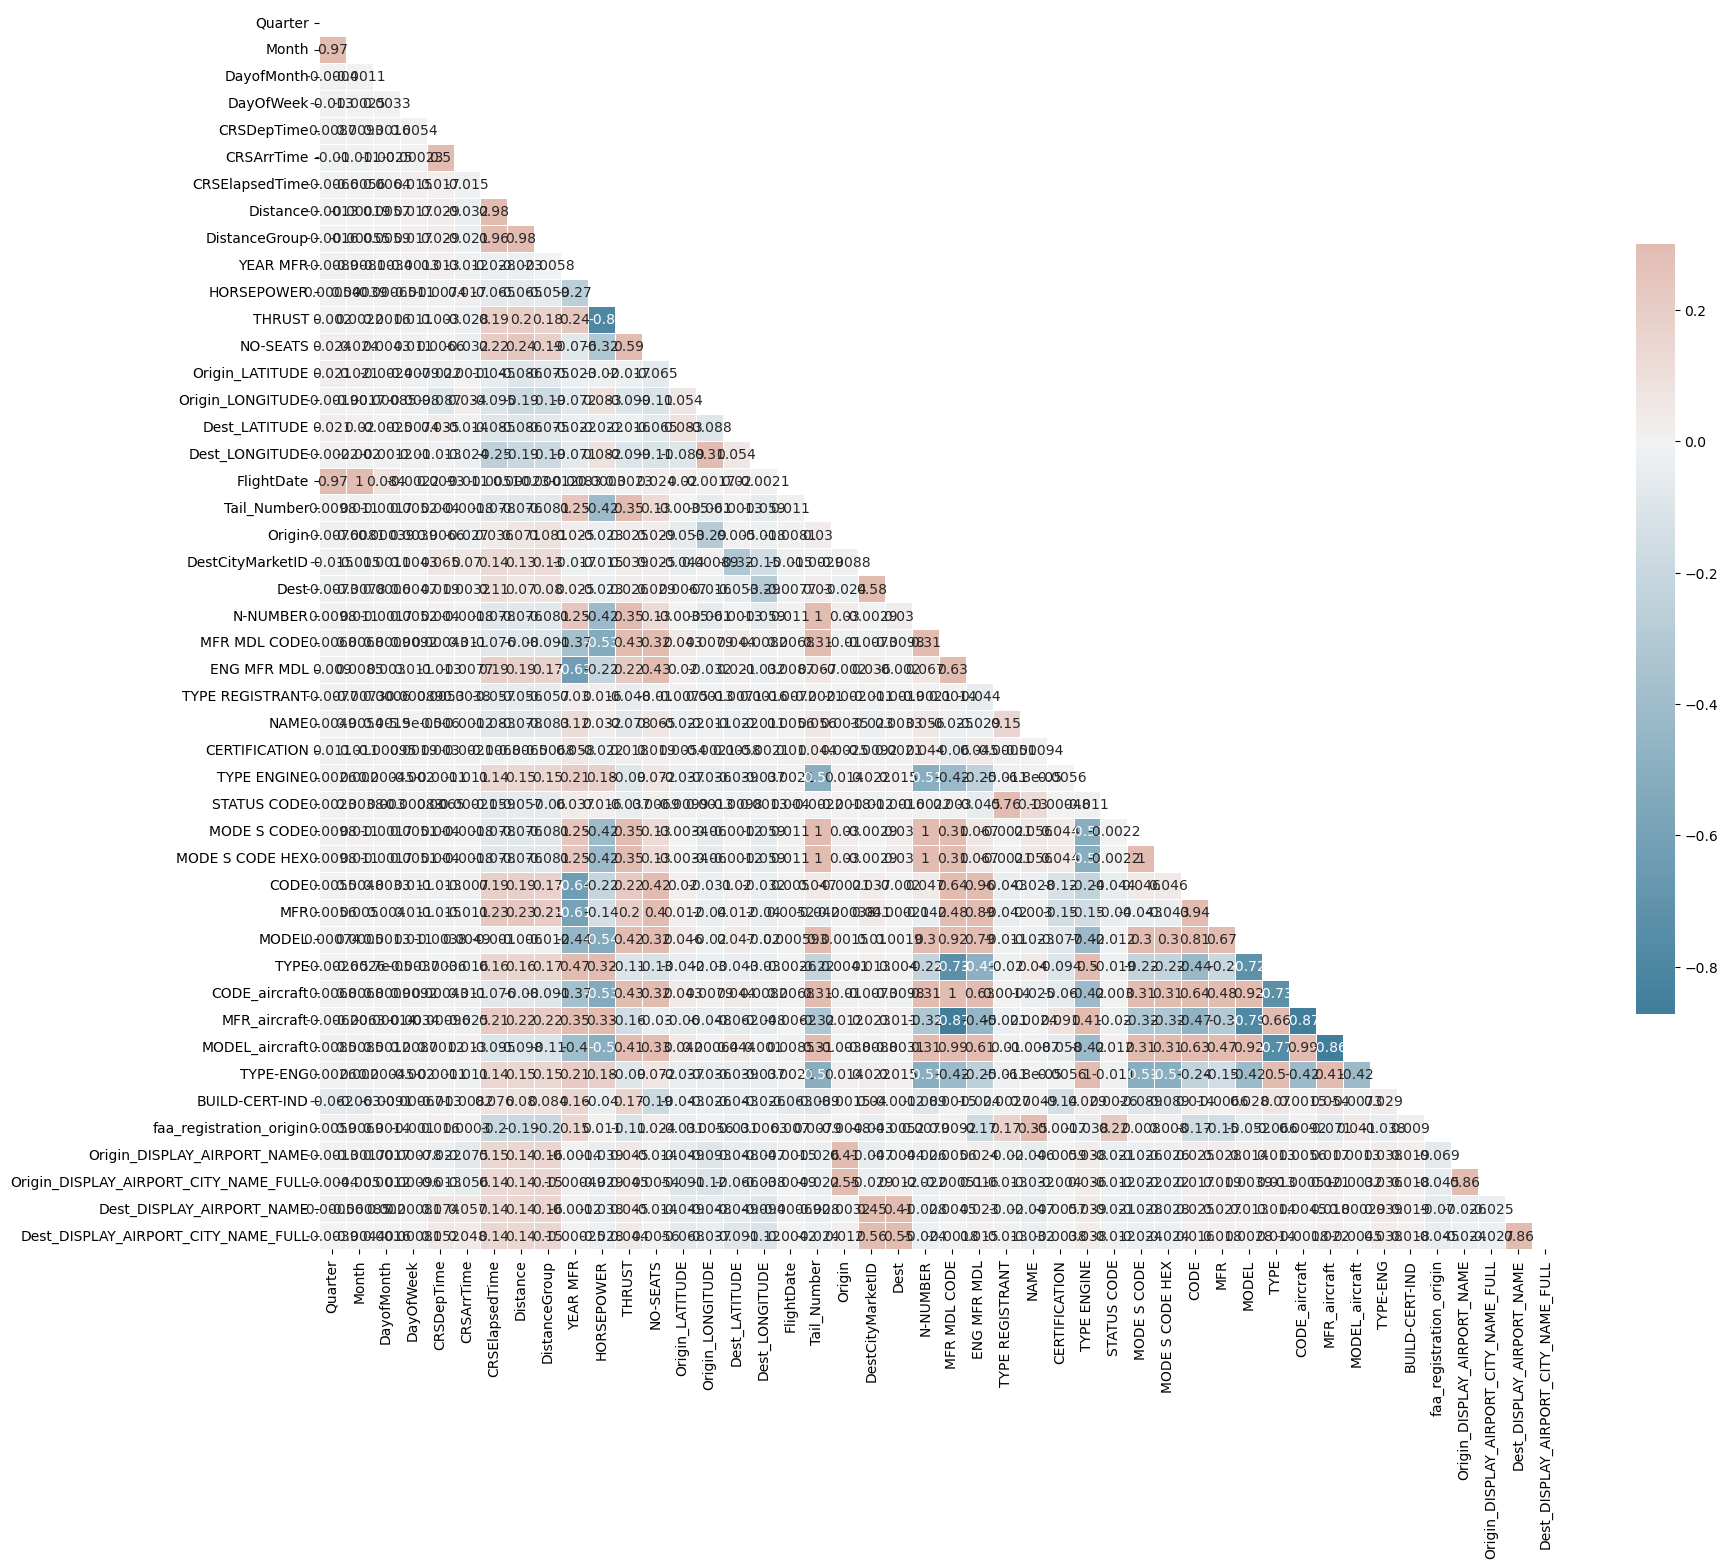

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt


mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(20, 20))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(
    correlation_matrix,
    mask=mask,
    cmap=cmap,
    vmax=0.3,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    annot=True,
)

plt.show()

In [62]:
threshold = 0.8

corr_matrix_abs = correlation_matrix.abs()

upper = corr_matrix_abs.where(
    np.triu(np.ones(corr_matrix_abs.shape), k=1).astype(np.bool)
)

to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

to_drop

/tmp/ipykernel_764934/2408292154.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


['Month',
 'Distance',
 'DistanceGroup',
 'FlightDate',
 'N-NUMBER',
 'MODE S CODE',
 'MODE S CODE HEX',
 'CODE',
 'MFR',
 'MODEL',
 'CODE_aircraft',
 'MFR_aircraft',
 'MODEL_aircraft',
 'TYPE-ENG',
 'Origin_DISPLAY_AIRPORT_CITY_NAME_FULL',
 'Dest_DISPLAY_AIRPORT_CITY_NAME_FULL']

In [59]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

df_features = df[num_cols + cat_cols].copy()

# label_encoder = LabelEncoder()
ordinal_encoder = OrdinalEncoder()

# for col in df_sample.columns:
#     df_sample[col] = df_sample[col].replace(r'^\s*$', 0, regex=True)
#     df_sample[col] = df_sample[col].replace(np.NaN, 0)

for col in cat_cols:
    df_features[col] = ordinal_encoder.fit_transform(df_features[col])

correlation_matrix = df.corr()

correlation_matrix

ValueError: Expected 2D array, got 1D array instead:
array=['2019-01-22 00:00:00' '2019-01-22 00:00:00' '2019-01-22 00:00:00' ...
 '2019-12-28 00:00:00' '2019-12-28 00:00:00' '2019-12-28 00:00:00'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [11]:
from sklearn.linear_model import LogisticRegression

start_time = time.time()

logistic_regression = LogisticRegression(solver='saga', max_iter=1000)
logistic_regression.fit(X_train, y_train)

end_time = time.time()

print(f"Elapsed time: {(end_time - start_time):.4f} seconds")

Elapsed time: 5307.1303 seconds


In [13]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    precision_recall_curve,
)
import matplotlib.pyplot as plt

y_pred = logistic_regression.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

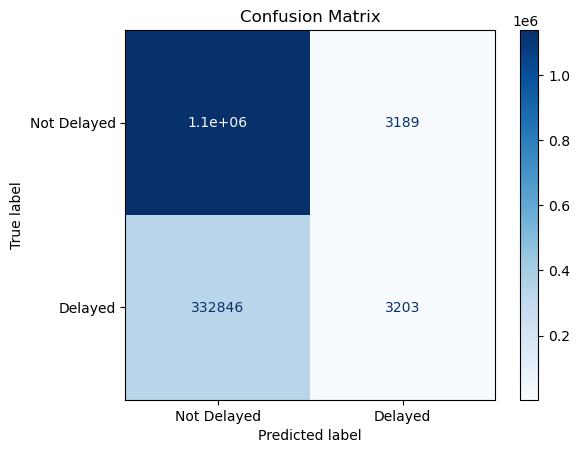

In [14]:
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=["Not Delayed", "Delayed"]
).plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

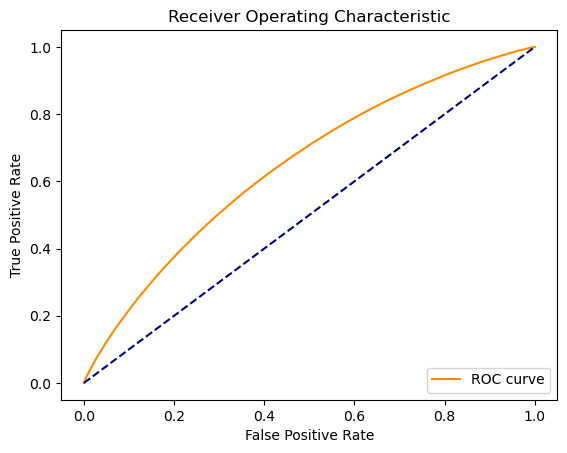

In [15]:
fpr, tpr, _ = roc_curve(y_test, logistic_regression.predict_proba(X_test)[:, 1])

plt.figure()
plt.plot(fpr, tpr, color="darkorange", label="ROC curve")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

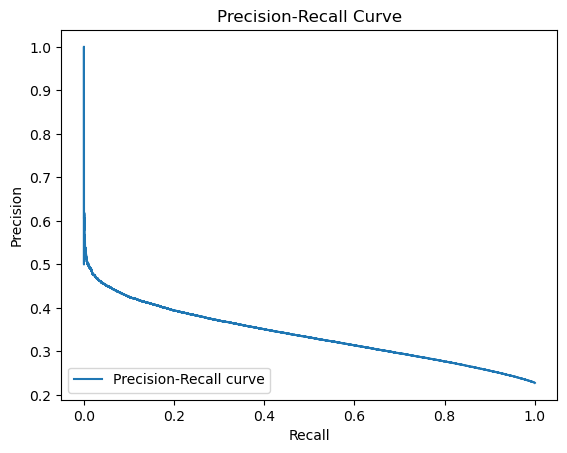

In [16]:
precision, recall, _ = precision_recall_curve(
    y_test, logistic_regression.predict_proba(X_test)[:, 1]
)

plt.figure()
plt.plot(recall, precision, label="Precision-Recall curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.show()

In [ ]:
import altair as alt

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


metrics_scores = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
}

df_metrics = pd.DataFrame(list(metrics_scores.items()), columns=["Metric", "Score"])

alt.Chart(df_metrics).mark_bar().encode(
    y="Metric:N", x="Score:Q", color="Metric:N", text=alt.Text("Score:Q", format=".2f")
).properties(title="Evaluation Metrics", width=600, height=300).configure_axis(
    labelFontSize=12, titleFontSize=14
)